In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [3]:
(train_X, train_Y), (test_X, test_Y) =  tf.keras.datasets.mnist.load_data()
train_X = train_X/255.0
test_X = test_X/255.0

In [6]:
train_X = train_X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)

In [7]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters = 32, kernel_size = 2, strides = (2,2), activation = "relu", input_shape = (28,28,1)),
        tf.keras.layers.Conv2D(filters = 64, kernel_size = 2, strides = (2,2), activation = "relu"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation = 'elu'),
        tf.keras.layers.Dense(7*7*64,activation = 'elu'),
        tf.keras.layers.Reshape(target_shape = (7,7,64)),
        tf.keras.layers.Conv2DTranspose(filters = 32, kernel_size = 2, strides = (2,2),padding = "same", activation = "elu"),
        tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 2, strides = (2,2), padding = "same",activation = "sigmoid"),
    
])

In [9]:
latent_vector_model = tf.keras.Model(inputs = model.input, outputs = model.layers[3].output)
latent_vector = latent_vector_model.predict(train_X)

In [11]:
print(latent_vector.shape)
print(latent_vector[0])

(60000, 64)
[ 0.06101048 -0.10437942  0.1242234  -0.04385495  0.02507821 -0.06893182
  0.01395128  0.00908959 -0.04212087 -0.05369544 -0.0539943  -0.03053373
 -0.08004057 -0.03597265 -0.07178503  0.04094373 -0.05058354 -0.00447357
  0.02509938  0.00538962 -0.00914848  0.03812589 -0.00615352  0.04266076
 -0.00856036  0.04846321 -0.04392159  0.02248125  0.01870654  0.00651408
 -0.08013338 -0.00510663 -0.03269875 -0.08967143 -0.01578385  0.00463117
  0.03411289 -0.00566489  0.01252818 -0.01454723  0.03642982  0.07240199
  0.06058757  0.00943261 -0.02343345  0.01047148 -0.01828814 -0.03500134
 -0.00683695  0.01982789  0.0548251   0.11133504  0.04044481 -0.02386552
 -0.00390935  0.07186462  0.0345284   0.03886764  0.09946106  0.03643234
  0.0053384  -0.04513443  0.0607885  -0.02262574]


In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 10, n_init = 100, random_state = 42)
kmeans.fit(latent_vector)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [20]:
print(kmeans.labels_)
print(kmeans.cluster_centers_.shape)
print(kmeans.cluster_centers_[0])

[0 7 2 ... 4 1 5]
(10, 64)
[ 0.01971831 -0.13760747  0.09005131 -0.03426138  0.02139356 -0.09121381
 -0.02494192  0.0276335  -0.00237365 -0.08522471 -0.07251415  0.0224029
 -0.0902478   0.00015701 -0.04429168  0.05412545 -0.0228036  -0.00073242
 -0.00086101  0.04240242 -0.00143977  0.03180951  0.03561172  0.01286612
  0.02818239  0.04947714 -0.01582175  0.05590006  0.03390352  0.0052782
 -0.04504711  0.04743673 -0.00746636 -0.0367363   0.01841713 -0.00774222
  0.06557722  0.01979404  0.01347407 -0.02341782  0.0383471   0.03861842
  0.01088551 -0.01247897 -0.03604829 -0.03834373 -0.01801652 -0.0035097
  0.02456262 -0.04106343  0.03552902  0.04539351  0.0114398   0.02208218
  0.04192871  0.05805846  0.01809265  0.01689115  0.06264853 -0.00758491
  0.01787263 -0.01013204  0.06164629 -0.00122353]


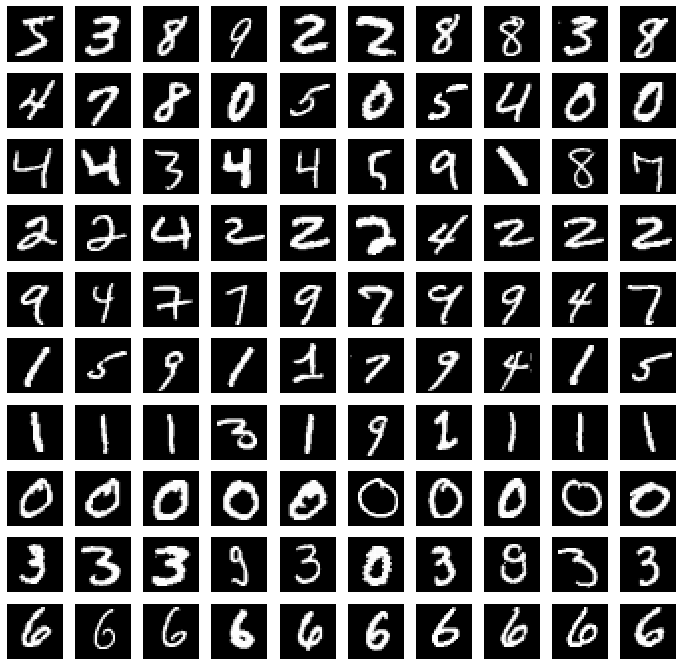

In [21]:
plt.figure(figsize = (12,12))

for i in range(10):
    images = train_X[kmeans.labels_ == i]
    for c in range(10):
        plt.subplot(10,10,i*10+c+1)
        plt.imshow(images[c].reshape(28,28),cmap = 'gray')
        plt.axis('off')
        
plt.show()

# t-SNE

In [24]:
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2, learning_rate = 100, perplexity = 15, random_state = 0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])



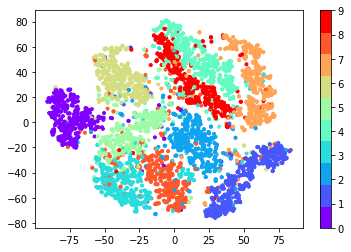

In [25]:
cmap = plt.get_cmap('rainbow',10)
fig = plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker = '.', c = train_Y[:5000], cmap = cmap)
cb = plt.colorbar(fig, ticks = range(10))
n_clusters = 10
tick_locs = (np.arange(n_clusters) + 0.5)* (n_clusters - 1) / n_clusters

In [26]:
cb.set_ticks(tick_locs)
cb.set_ticklabels(range(10))
plt.show()

In [28]:
latent_vector[:1]

array([[ 0.06101048, -0.10437942,  0.1242234 , -0.04385495,  0.02507821,
        -0.06893182,  0.01395128,  0.00908959, -0.04212087, -0.05369544,
        -0.0539943 , -0.03053373, -0.08004057, -0.03597265, -0.07178503,
         0.04094373, -0.05058354, -0.00447357,  0.02509938,  0.00538962,
        -0.00914848,  0.03812589, -0.00615352,  0.04266076, -0.00856036,
         0.04846321, -0.04392159,  0.02248125,  0.01870654,  0.00651408,
        -0.08013338, -0.00510663, -0.03269875, -0.08967143, -0.01578385,
         0.00463117,  0.03411289, -0.00566489,  0.01252818, -0.01454723,
         0.03642982,  0.07240199,  0.06058757,  0.00943261, -0.02343345,
         0.01047148, -0.01828814, -0.03500134, -0.00683695,  0.01982789,
         0.0548251 ,  0.11133504,  0.04044481, -0.02386552, -0.00390935,
         0.07186462,  0.0345284 ,  0.03886764,  0.09946106,  0.03643234,
         0.0053384 , -0.04513443,  0.0607885 , -0.02262574]],
      dtype=float32)

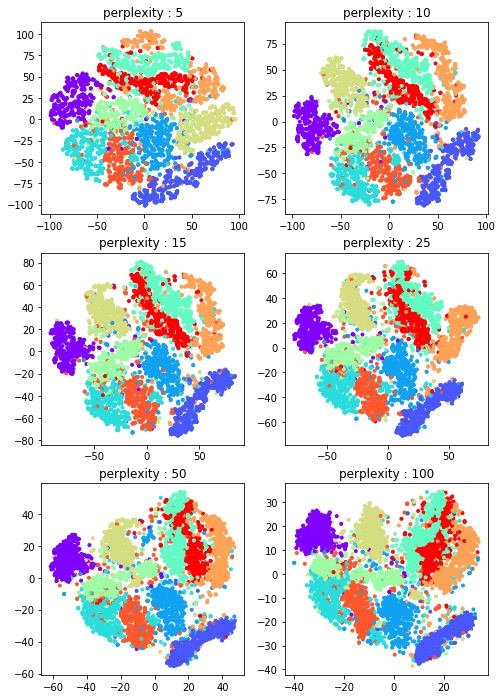

Wall time: 4min 16s


In [30]:
%%time

perplexities = [5,10,15,25,50,100]
plt.figure(figsize = (8,12))

for c in range(6):
    tsne = TSNE(n_components = 2, learning_rate = 100, perplexity = perplexities[c], random_state = 0)
    tsne_vector = tsne.fit_transform(latent_vector[:5000])
    
    plt.subplot(3,2,c+1)
    plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker = '.', c=train_Y[:5000], cmap = 'rainbow')
    plt.title('perplexity : {0}'.format(perplexities[c]))
    
plt.show()